In [1]:
import librosa
audio_path = 'example.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [2]:
print(x.shape, sr)

(739329,) 22050


In [3]:
librosa.load(audio_path, sr=44100)

(array([-1.3490368e-03, -1.8147993e-03, -2.0491614e-03, ...,
        -2.8340209e-03, -9.1500719e-05,  6.2328938e-04], dtype=float32), 44100)

In [4]:
import IPython.display as ipd
ipd.Audio(audio_path)

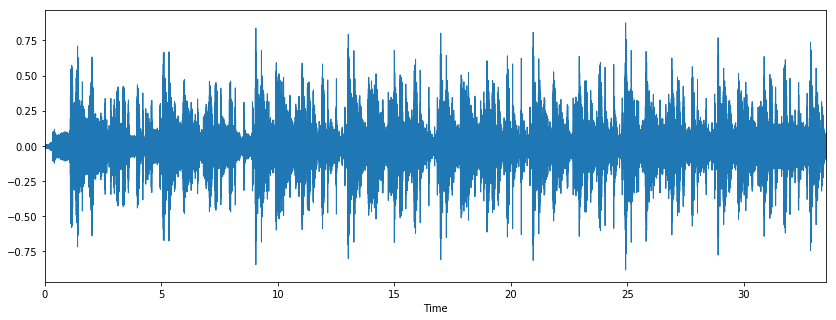

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sr)

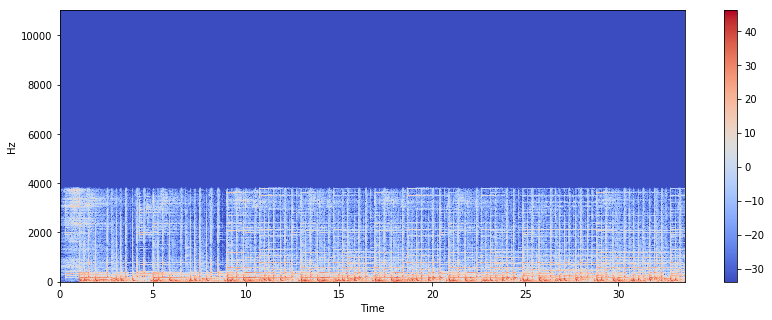

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

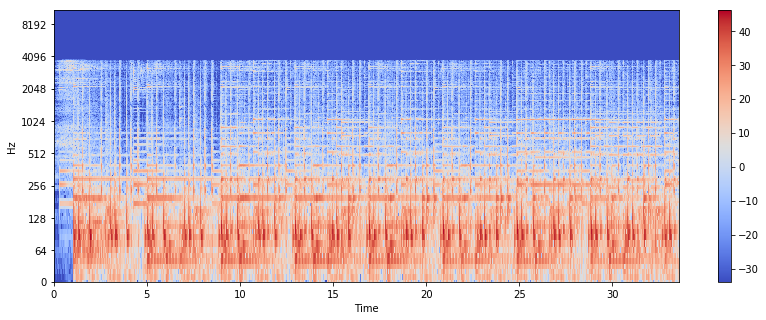

In [19]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [21]:
librosa.output.write_wav('example.wav', x, sr)

In [23]:
import numpy as np
sr = 22050 #sample rate
T = 5.0 # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t) # pure sine wave at 220Hz

In [25]:
ipd.Audio(x, rate=sr)

In [27]:
librosa.output.write_wav('tone_220.wav', x, sr)

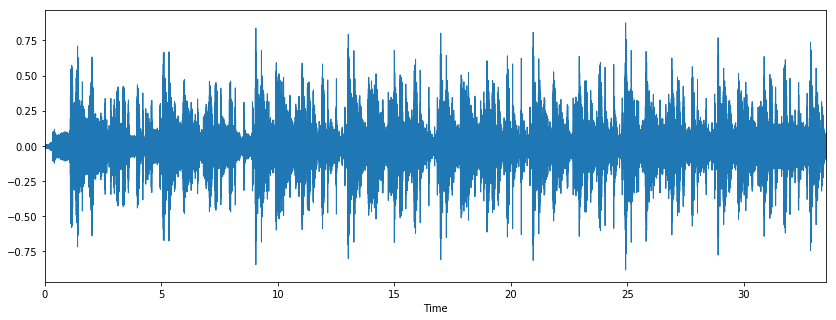

In [29]:
# Load the signal
x, sr = librosa.load('example.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

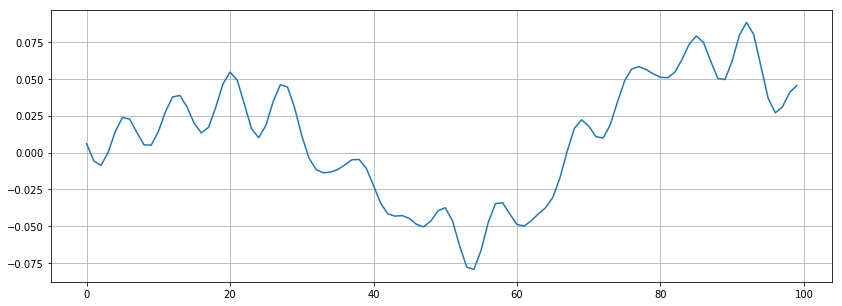

In [31]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [33]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings)) #Zero-Crossing Rate

4


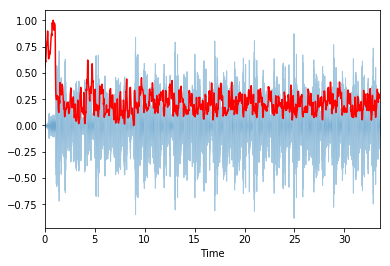

In [36]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

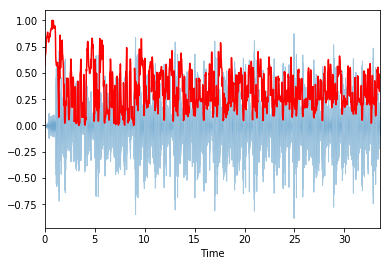

In [38]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r') #spectral rolloff

(20, 1445)


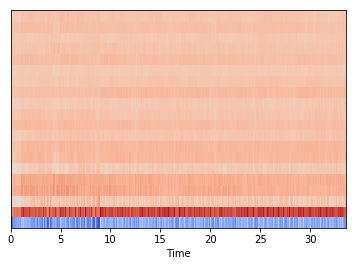

In [49]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time') 
#Mel-Frequency Cepstral Coefficients

[-2.39243558e-09 -1.97994670e-08  2.36768631e-08  2.87092270e-08
 -9.40474632e-09  2.12947384e-08 -2.87917246e-08 -1.08897069e-08
 -1.34265132e-08  1.64995562e-09 -1.22096715e-08  2.55330619e-08
 -8.01878386e-08 -7.83728904e-09 -2.45430898e-09  4.37238246e-09
  4.01145428e-09 -9.85848470e-09 -1.17146843e-08  1.01472271e-08]
[1.         1.0000001  1.0000004  1.0000004  0.99999994 0.99999994
 1.         1.0000002  0.99999994 0.99999994 1.         1.0000001
 0.9999998  1.0000001  1.0000002  0.9999998  1.0000005  1.0000001
 0.99999994 1.0000001 ]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


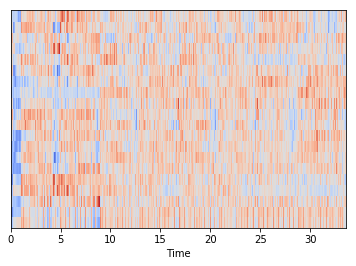

In [51]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time') 
#Mel-Frequency Cepstral Coefficients feature scaling 

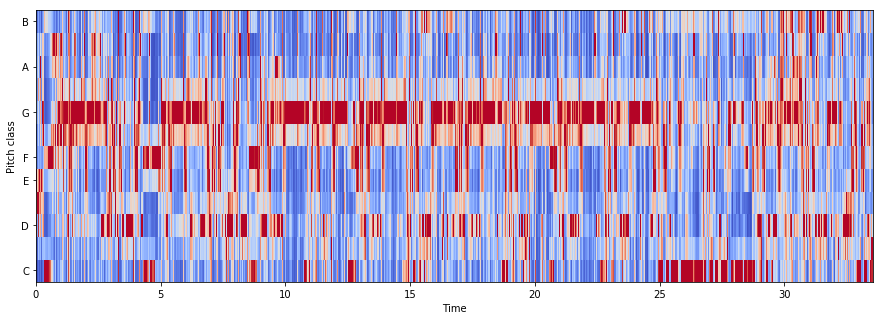

In [53]:
# Loadign the file
x, sr = librosa.load('example.wav')
# Chroma Frequencies
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')